In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns  # Imorting Seaborn library
import os

df=pd.read_csv('Group16_RegressionData (1).csv', index_col=0)
df.head()
df.info()
df.tail()
y=df.Age
x= df.drop(["Age"], axis=1) 
x= x.drop(["Left-WM-hypointensities"], axis=1) 
x= x.drop(["Right-WM-hypointensities"], axis=1) 
x= x.drop(["Left-non-WM-hypointensities"], axis=1) 
x= x.drop(["Right-non-WM-hypointensities"], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 1 to 4226
Columns: 140 entries, Left-Lateral-Ventricle to dataset
dtypes: float64(122), int64(18)
memory usage: 4.5 MB


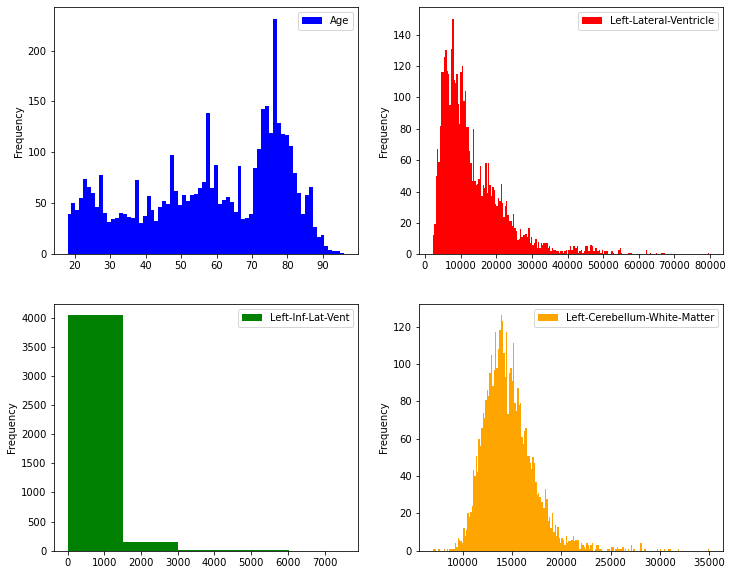

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="Age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="Left-Lateral-Ventricle", bins=200, color="r", ax=axes[0][1])
df.plot(kind="hist", y="Left-Inf-Lat-Vent", bins=5, color="g", ax=axes[1][0])
df.plot(kind="hist", y="Left-Cerebellum-White-Matter", bins=200, color="orange", ax=axes[1][1])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)


Training Accuracy for Multiple Linear Regression Model:  0.8604949801832151
Testing Accuracy for Multiple Linear Regression Model:  0.8560499614081654
RMSE for Training Data:  7.472773323711373
RMSE for Testing Data:  7.6839257972409545


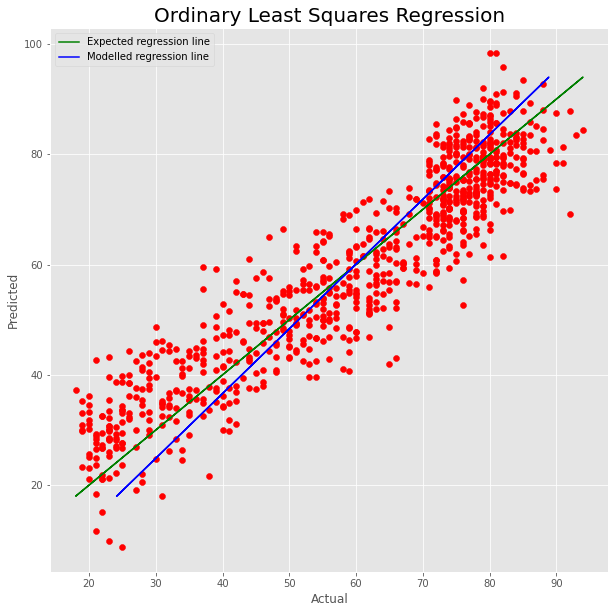

In [ ]:
plt.figure(figsize=(10, 10))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred_MLR_test, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_pred_MLR_test, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Modelled regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title("Ordinary Least Squares Regression", fontsize=20)
    plt.legend()
    plt.plot()
